In [1]:
# import necessary modules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from evaluation import test
from utils import load_data, predict_image, scatter_plot, contour_plot
from utils import plot_boundary, load_cat_dataset, load_iris_2D

from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures

from lr import LogisticRegression

References:

https://github.com/beckernick/logistic_regression_from_scratch

https://github.com/martinpella/logistic-reg/blob/master/logistic_reg.ipynb

https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-3-regularization

What can you do after implementing logistic regression? Of course we can do binary classification! It means we can linearly separate a dataset if it has two classes. For example, the iris dataset, if we combine label 1 and 2 as one class.

In [2]:
X, y = load_iris_2D()
# pd.DataFrame(X).describe()
# pd.DataFrame(X).info()


    load iris and combine label 1, 2 into 1
    only use the first two features of X
    


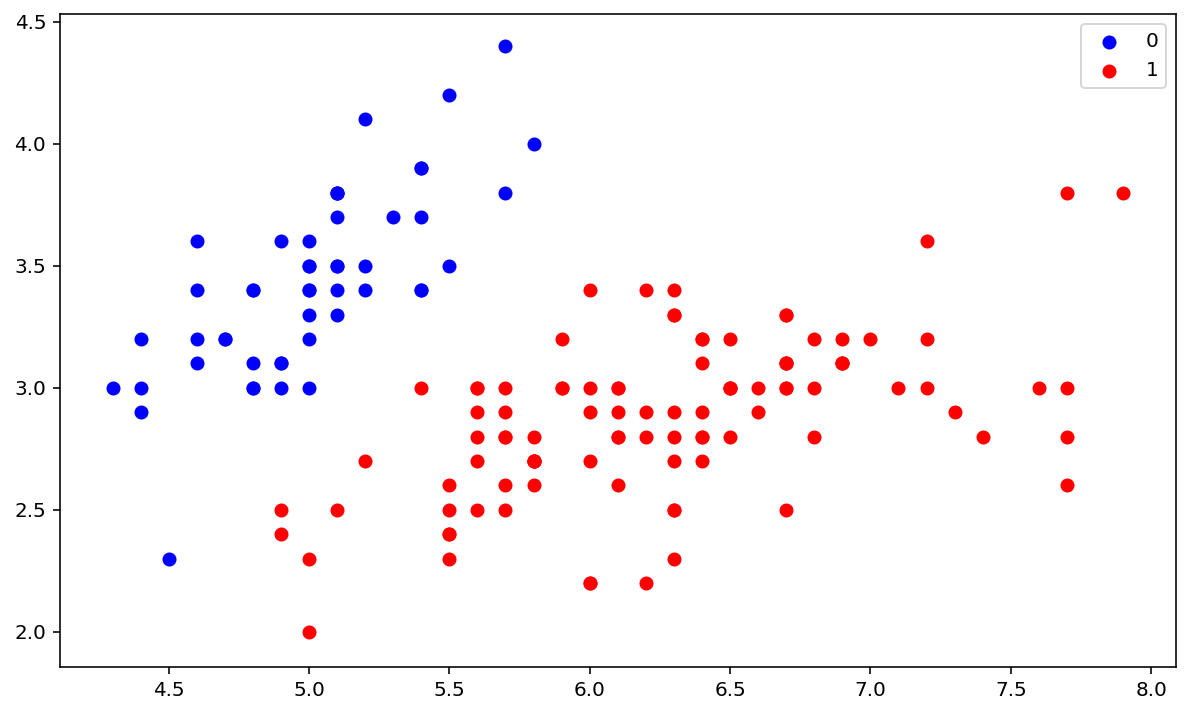

In [3]:
# scatter plot the data in two dimension
scatter_plot(X, y);

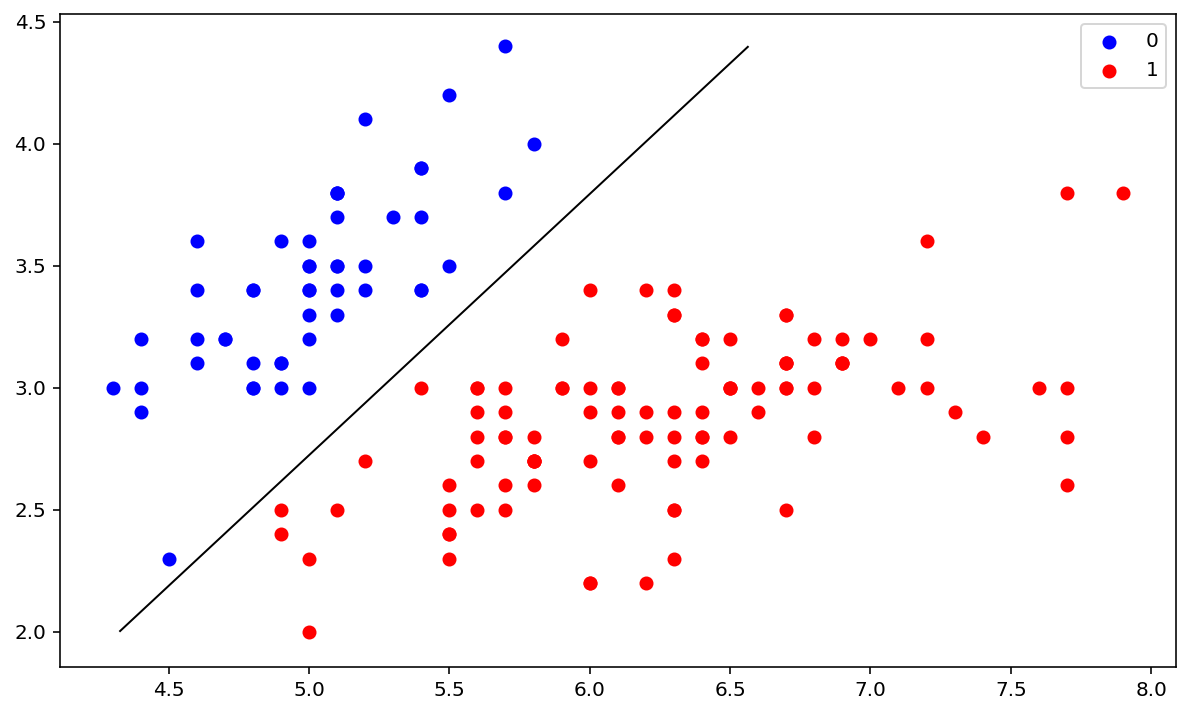

In [4]:
skclf = linear_model.LogisticRegression(fit_intercept=True, solver='lbfgs')
skclf.fit(X,y)
contour_plot(X, y, skclf);

What we do if our data is not linearly separatable?

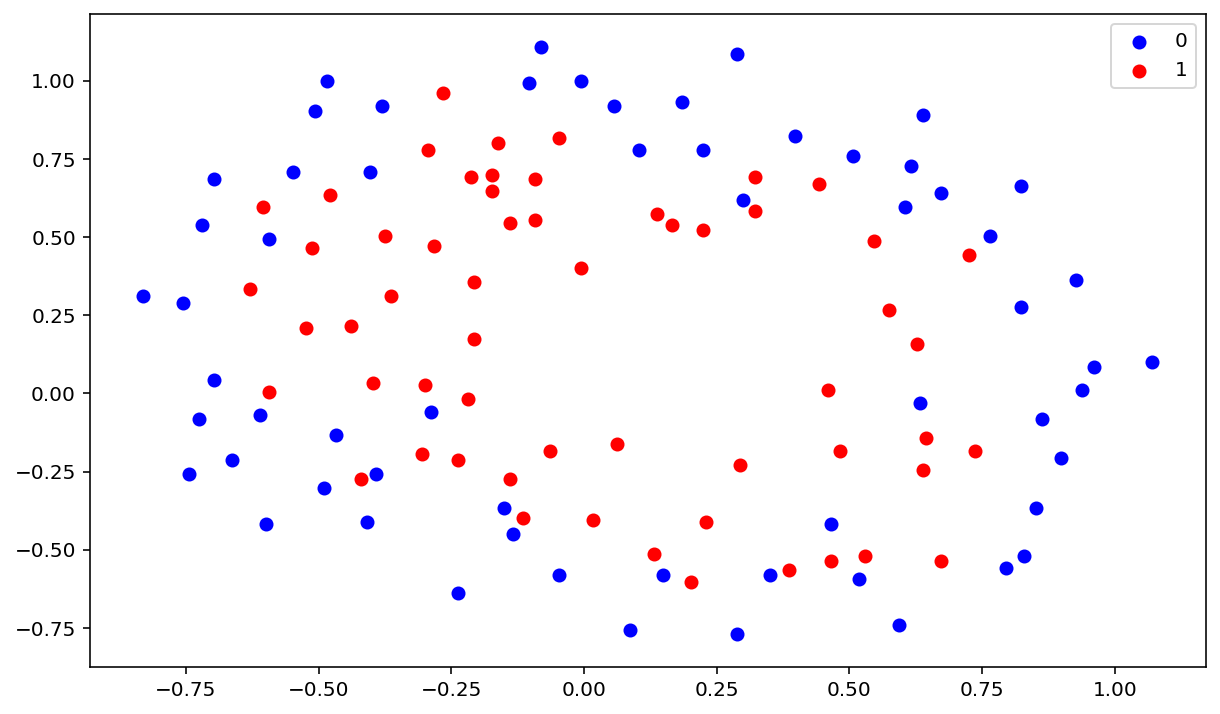

In [5]:
microchip = load_data('microchip_tests.txt')
X = microchip.iloc[:,:2].values
y = microchip.iloc[:,2].values
scatter_plot(X, y);

We can use some feature engineering trick to increase the number of features of our original data so that it can be linearly seperatable in high dimension. Then visualize how curve, which is also the line in hign dimensional space to seperate our dataset.

In [6]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(117, 36)

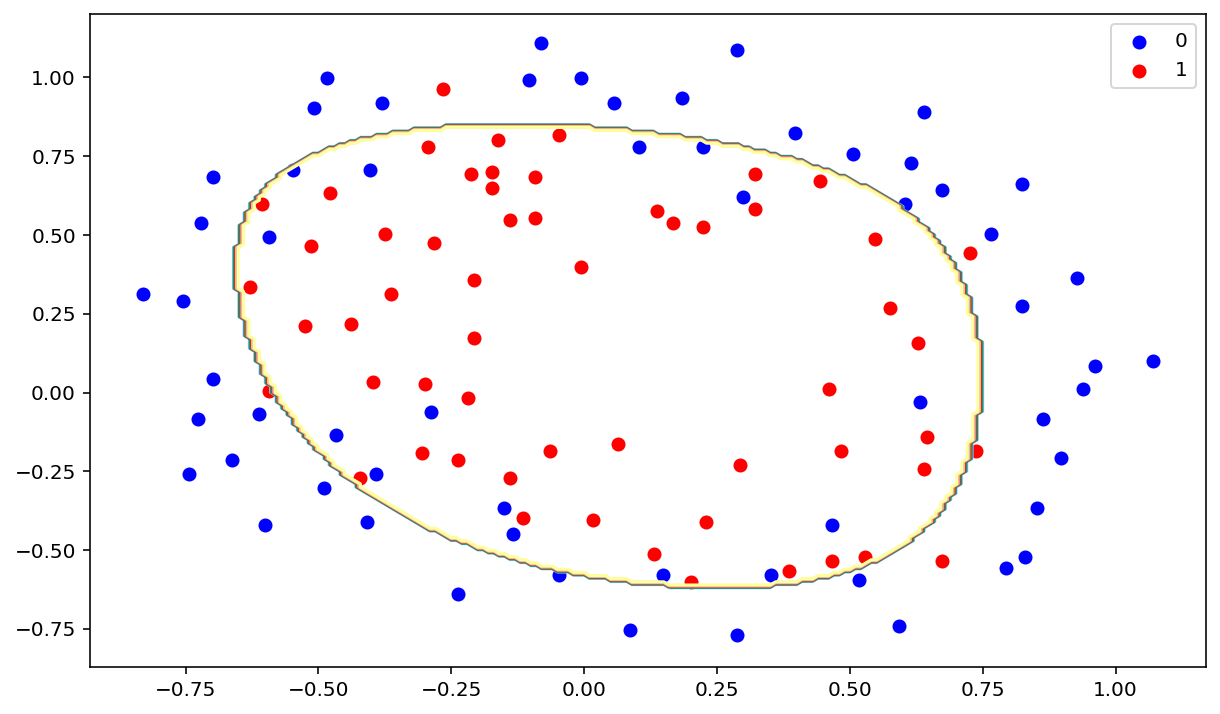

In [7]:
skclf = linear_model.LogisticRegression(solver='newton-cg')
skclf.fit(X_poly, y)
scatter_plot(X, y)
plot_boundary(skclf, X, y, grid_step=.01, poly_featurizer=poly);

A more interesting example would be to use logistic regression to build a classifier for cat images.

In [ ]:
X_train, X_test, y_train, y_test, num_px, classes = load_cat_dataset()

In [ ]:
skclf = linear_model.LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000)
skclf = test(skclf, X_train, X_test, y_train, y_test)

In [ ]:
cat_image = "my_image3.jpg"   # change this to the name of your image file 
predict_image(clf= skclf, fname=cat_image, num_px=num_px, classes=classes, plot_image=True)

In [ ]:
not_cat_image = "my_image.jpg"
predict_image(clf= skclf, fname=not_cat_image, num_px=num_px, classes=classes, plot_image=True)

Enough motivation examples! Next step let's see how we can build our own logistic regression from scratch.

In [10]:
a = np.array([1,2,3])
b = a[0]
b = [0]
a[:1]

array([1])

In [ ]:
model = LogisticRegression(num_iterations=300000, learning_rate=0.1, fit_intercept=True, print_cost=False)

In [ ]:
%time model.fit(X, y)

In [ ]:
model.weights
preds = model.predict(X)
print('Confusion Matrix: \n', confusion_matrix(y,preds))    
print('Accuracy: ', accuracy_score(y, preds))

In [ ]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
pd.DataFrame(simulated_separableish_features).describe()
X_train, X_test, y_train, y_test = train_test_split(simulated_separableish_features,
                                                    simulated_labels, 
                                                    test_size = 0.20, 
                                                    random_state = 0,
                                                    stratify = simulated_labels)

In [ ]:
model = LogisticRegression(num_iterations=300000, learning_rate =.1, fit_intercept=True,
                            print_cost=True)
clf = LogisticRegression(num_iterations=300000, learning_rate =.1, fit_intercept=True,
                            print_cost=True)
clf = test(clf, X_train, X_test, y_train, y_test)
print(clf.weights)
skclf = linear_model.LogisticRegression(penalty='none', fit_intercept=True, solver='lbfgs')
skclf = test(skclf, X_train, X_test, y_train, y_test)
print(skclf.intercept_, skclf.coef_)

In [ ]:
clf = LogisticRegression(num_iterations=300000, learning_rate =.1, fit_intercept=True,
                            print_cost=True, penalty='l2', C=0.3)
clf = test(clf, X_train, X_test, y_train, y_test)
print(clf.weights)


skclf = linear_model.LogisticRegression(C=0.3, fit_intercept=True, solver='lbfgs')
skclf = test(skclf, X_train, X_test, y_train, y_test)
print(skclf.intercept_, skclf.coef_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size = 0.20, 
                                            random_state = 0,
                                            stratify = y)

In [ ]:
clf = LogisticRegression(num_iterations=300000, learning_rate=0.1, fit_intercept=True,
                           print_cost=True)

clf = test(clf, X_train, X_test, y_train, y_test)
print(clf.weights)

skclf = linear_model.LogisticRegression(penalty='none', fit_intercept=True, solver='lbfgs')
skclf = test(skclf, X_train, X_test, y_train, y_test)
print(skclf.intercept_, skclf.coef_)

In [ ]:
clf = LogisticRegression(num_iterations=300000, learning_rate=0.1, fit_intercept=True,
                         print_cost=True, penalty='l2', C=0.5)

clf = test(clf, X_train, X_test, y_train, y_test)
print(clf.weights)
skclf = linear_model.LogisticRegression(C=0.5, fit_intercept=True, solver='lbfgs')
skclf = test(skclf, X_train, X_test, y_train, y_test)
print(skclf.intercept_, skclf.coef_)

Another alternative Logistic regression is update weights using SGD

Image classification using logistic regression

Can our own implementation of Logistic Regression perform the same task?
Let's check

In [ ]:
clf = LogisticRegression(num_iterations=3000, learning_rate=1e-2, fit_intercept=True, print_cost=False)
clf = test(clf, X_train, X_test, y_train, y_test)

In [ ]:
predict_image(clf= clf, fname=cat_image, num_px=num_px, classes=classes)

In [ ]:
predict_image(clf= clf, fname=not_cat_image, num_px=num_px, classes=classes)

Note that although our own implementation can successfully predict the cat image, but our testing performance is not as good as sklearn. This may causes by the regularization function in sklearn.
https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LogisticRegression/ML_RegularizedLogisticRegression.ipynb

We can see that regularization does help in improving our test performance?
What are the best C value we should choose?

In [ ]:
c_values = np.logspace(-2, 0, 15)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
print(list(c_values))

In [ ]:
logit_searcher = linear_model.LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1, max_iter=1000)
logit_searcher.fit(X_train, y_train)

In [ ]:
logit_searcher.C_

In [ ]:
skclf = linear_model.LogisticRegression(C = logit_searcher.C_[0],solver='lbfgs', max_iter=1000)
skclf = test(skclf, X_train, X_test, y_train, y_test)

In [ ]:
skclf = linear_model.LogisticRegression(C = 0.3,solver='lbfgs', max_iter=1000)
skclf = test(skclf, X_train, X_test, y_train, y_test)

In [ ]:
clf = LogisticRegression(num_iterations=6000, learning_rate=1e-2, fit_intercept=True, print_cost=False, 
                         penalty = 'l2',
                         C=0.3)
clf = test(clf, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(num_iterations=1000, learning_rate=1e-2, fit_intercept=True, print_cost=False)
parameters = {'C': c_values}
clf = GridSearchCV(clf, parameters, cv=skf)
clf.fit(X_train, y_train)
clf.get_params()

In [ ]:
clf.best_score_
clf.best_params_

In [ ]:
df=pd.read_csv("./datasets/ex2data2.txt", header=None)
df.head()
df.describe()

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.figure(figsize=(8, 8))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

In [ ]:
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state = 0,
                                                    stratify = y)
clf = LogisticRegression(num_iterations=3000, learning_rate=0.1, fit_intercept=True, steps=20, print_cost=False)
test(clf, X_train, X_test, y_train, y_test)

In [ ]:
degree = 6
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out
X = mapFeature(X[:,0], X[:,1],degree)
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = y)
clf = LogisticRegression(num_iterations=1000000, learning_rate=5e-1, fit_intercept=True,steps=100000, 
                         print_cost=False)
clf = test(clf, X_train, X_test, y_train, y_test)

In [ ]:
plt.plot(clf.costs)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out
# plt.figure(figsize=(8, 8))
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],degree) @ clf.weights[1:]

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [ ]:
clf = LogisticRegression(num_iterations=1000000, learning_rate=5e-1, fit_intercept=True,steps=100000, C=0.1,
                         print_cost=False)
clf = test(clf, X_train, X_test, y_train, y_test)

In [ ]:
plt.plot(clf.costs)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],degree) @ clf.weights[1:]

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [ ]:
# https://github.com/Yorko/mlcourse.ai
# https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-3-regularization
# loading data
data = pd.read_csv('microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))
# getting some info about dataframe
data.info()
data.describe()

In [ ]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=1')
plt.legend();

In [ ]:


X_poly = poly.fit_transform(X)
X_poly.shape

In [ ]:
C = 1e-2
logit = linear_model.LogisticRegression(penalty='none', random_state=17, solver='lbfgs', max_iter=1e4)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % 0)
plt.legend();

print("Accuracy on training set:", 
      round(logit.score(X_poly, y), 3))

In [ ]:
C = 1e-2
logit = linear_model.LogisticRegression(C=C, random_state=17, solver='lbfgs')
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend();

print("Accuracy on training set:", 
      round(logit.score(X_poly, y), 3))

In [ ]:
C = 1
logit = linear_model.LogisticRegression(C=C, random_state=17, solver='lbfgs')
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend();

print("Accuracy on training set:", 
      round(logit.score(X_poly, y), 3))

In [ ]:
C = 1e4
logit = linear_model.LogisticRegression(C=C, random_state=17, solver='lbfgs', max_iter=1000)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend();

print("Accuracy on training set:", 
      round(logit.score(X_poly, y), 3))

In [ ]:
0 is 0

In [ ]:
np.finfo(float).eps
np.finfo(np.float64).eps

In [ ]:
np.empty((1))[0] == 33.